In [1]:
import scapy.all as sca

/usr/local/lib/python3.8/dist-packages/scapy/layers/ipsec.py:471: CryptographyDeprecationWarning: Blowfish has been deprecated
  cipher=algorithms.Blowfish,
/usr/local/lib/python3.8/dist-packages/scapy/layers/ipsec.py:485: CryptographyDeprecationWarning: CAST5 has been deprecated
  cipher=algorithms.CAST5,


In [2]:
pcap_flow = sca.rdpcap("../sample_pcap_files/R11_R21.pcap")
pcap_flow

<R11_R21.pcap: TCP:6 UDP:9994 ICMP:0 Other:0>

In [3]:
p = next( p for p in pcap_flow if p.haslayer(sca.UDP) )
p

<Ether  dst=52:54:00:09:4a:73 src=52:54:00:06:cc:b9 type=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=31 id=58599 flags=DF frag=0 ttl=63 proto=udp chksum=0x87fe src=192.168.111.10 dst=192.168.222.140 |<UDP  sport=46924 dport=8001 len=11 chksum=0xe7f8 |<Raw  load='hi\n' |>>>>

In [4]:
p.command()

"Ether(dst='52:54:00:09:4a:73', src='52:54:00:06:cc:b9', type=2048)/IP(version=4, ihl=5, tos=0, len=31, id=58599, flags=2, frag=0, ttl=63, proto=17, chksum=34814, src='192.168.111.10', dst='192.168.222.140')/UDP(sport=46924, dport=8001, len=11, chksum=59384)/Raw(load=b'hi\\n')"

In [5]:
float(p.time)

1677684137.651236

In [6]:
p.show()

###[ Ethernet ]### 
  dst       = 52:54:00:09:4a:73
  src       = 52:54:00:06:cc:b9
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 31
     id        = 58599
     flags     = DF
     frag      = 0
     ttl       = 63
     proto     = udp
     chksum    = 0x87fe
     src       = 192.168.111.10
     dst       = 192.168.222.140
     \options   \
###[ UDP ]### 
        sport     = 46924
        dport     = 8001
        len       = 11
        chksum    = 0xe7f8
###[ Raw ]### 
           load      = 'hi\n'



In [7]:
p.fields

{'dst': '52:54:00:09:4a:73', 'src': '52:54:00:06:cc:b9', 'type': 2048}

In [8]:
p.direction

In [9]:
p.layers()

[scapy.layers.l2.Ether,
 scapy.layers.inet.IP,
 scapy.layers.inet.UDP,
 scapy.packet.Raw]

In [10]:
p.payload

<IP  version=4 ihl=5 tos=0x0 len=31 id=58599 flags=DF frag=0 ttl=63 proto=udp chksum=0x87fe src=192.168.111.10 dst=192.168.222.140 |<UDP  sport=46924 dport=8001 len=11 chksum=0xe7f8 |<Raw  load='hi\n' |>>>

In [11]:
bool(p.haslayer(sca.IP))

True

In [12]:
bool(p.haslayer(sca.TCP))

False

In [13]:
bool(p.haslayer(sca.ICMP))

False

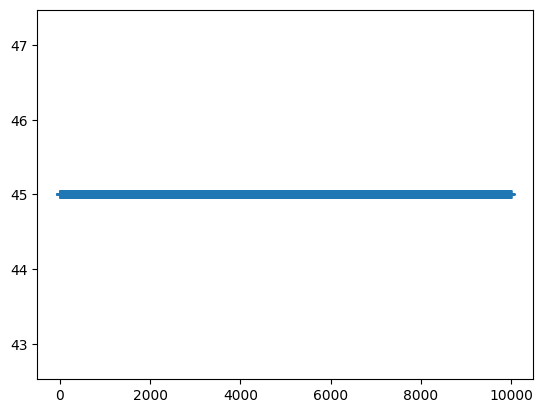

In [14]:
pcap_flow.plot(lambda x:len(x), lfilter=lambda x: x.haslayer(sca.UDP))